In [45]:
import pandas as pd

In [46]:
lw_df = pd.read_csv('LW_Data.csv')
edu_df = pd.read_csv('Education_Data.csv')
employment_data = pd.read_csv('Employment_Data.csv')
population_data = pd.read_csv('Population_Data.csv')

In [47]:
print(len(lw_df))
print(len(edu_df))
print(len(employment_data))
print(len(population_data))

3526
3215
3214
3219


In [48]:
lw_df = lw_df.rename(columns={'Fips Code': 'fips_state_county_code'})
edu_df = edu_df.rename(columns={'FIPS Code': 'fips_state_county_code'})
employment_data = employment_data.rename(columns={'FIPS_Code': 'fips_state_county_code'})

In [49]:
df = edu_df.merge(lw_df, on='fips_state_county_code', how = "left")
df1 = df.merge(employment_data, on='fips_state_county_code', how = "left")
df_main = df1.merge(population_data, on='fips_state_county_code', how = "left")

In [50]:
#Tranlate RUCC codes to dummie columns
df_main = pd.get_dummies(df_main, columns=['rucc'])

In [51]:
df_main.to_csv('../ML_Ready_Data/county_data.csv', index=False)

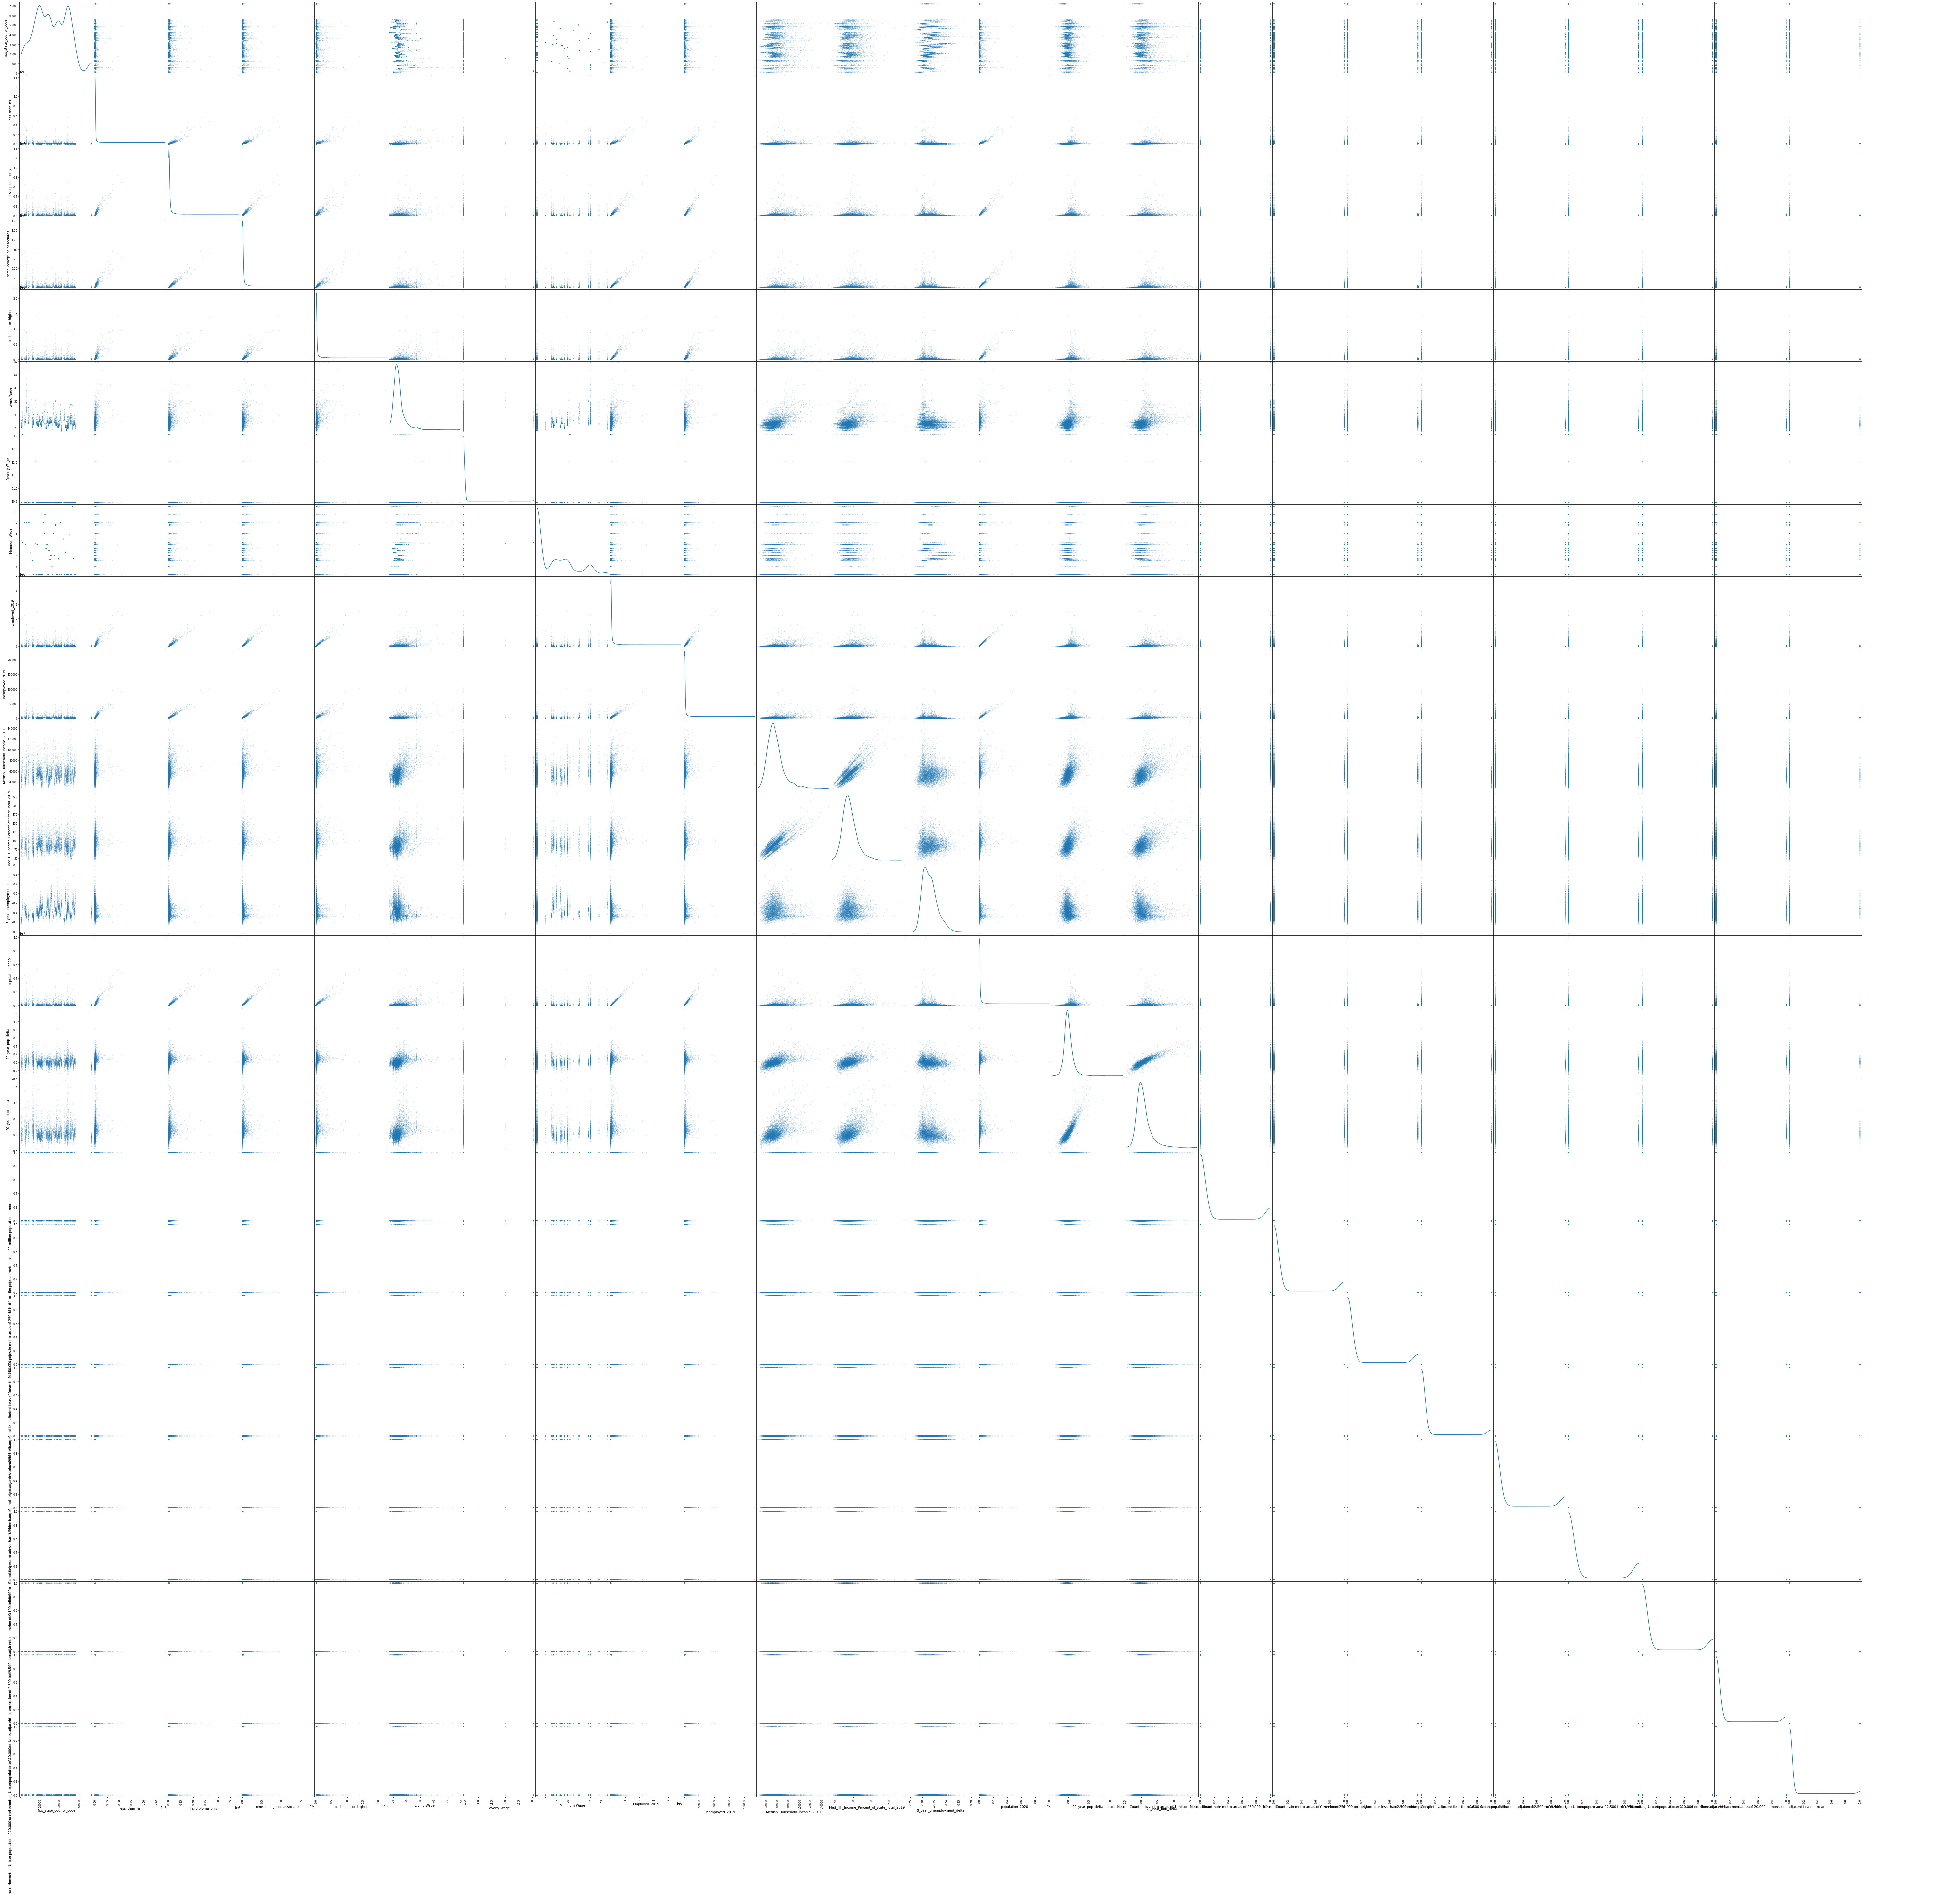

In [54]:
#scatter matrix
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(df_main, alpha=0.2, figsize=(100, 100), diagonal='kde')
plt.show()